In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

## Loads the dataset from the specified file path.

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Komilo_proj/Datasets/My_Datasets/ANN_with_merged_data.csv", header=0)

<ipython-input-4-9403a27e579c>:1: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Komilo_proj/Datasets/My_Datasets/ANN_with_merged_data.csv", header=0)


## Renames the columns for clarity.

Ax, Ay, Az → Accelerometer readings (X, Y, Z axes).

Gx, Gy, Gz → Gyroscope readings (X, Y, Z axes).

Movement → Label for activity classification.

# Feature Engineering

In [5]:
df.columns = ['Time', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Movement']

 ## Removes the first column from dataset as the first column was an unnecessary index (or) timestamp.

In [6]:
df = df.iloc[:, 1:]

## The dataset contains accelerometer (Ax, Ay, Az), gyroscope (Gx, Gy, Gz), and a Movement column, which represents activity labels (eating, standing, walking, sleeping, sitting, ruminating).

In [7]:
df.head()

,Ax,Ay,Az,Gx,Gy,Gz,Movement
0,0.9352,0.1724,-0.1853,10.6592,5.9937,6.5088,standing
1,1.0557,-0.1746,0.3494,-103.1006,45.6616,-13.9697,standing
2,0.9341,0.1008,-0.0164,-14.3921,-37.6025,-30.0049,standing
3,0.9913,0.3686,0.2831,-1.2402,30.2222,5.8521,standing
4,1.0998,0.2021,0.0040,-10.1733,-13.4399,2.4292,standing


## Information of the dataset include:

**Dataset Size:** 1,368,929 rows and 7 columns

**Data Types:**

6 numerical columns (float64): Sensor readings (Ax, Ay, Az, Gx, Gy, Gz).

1 categorical column (object): Movement, representing activity labels.

**Missing Values:**

Movement column has 4 missing values (1,188,925 non-null vs. 1,188,929 total rows).
No missing values in the sensor data columns.

**Memory Usage:**

The dataset occupies 73.1 MB, which is manageable for analysis and model training.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368929 entries, 0 to 1368928
Data columns (total 7 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Ax        1188089 non-null  float64
 1   Ay        1188089 non-null  float64
 2   Az        1188089 non-null  float64
 3   Gx        1188089 non-null  float64
 4   Gy        1188089 non-null  float64
 5   Gz        1188089 non-null  float64
 6   Movement  1188085 non-null  object 
dtypes: float64(6), object(1)
memory usage: 73.1+ MB


## Observation of dataset include:

**Dataset Overview:**

The dataset contains 1,188,089 sensor readings for each column (Ax, Ay, Az, Gx, Gy, Gz).

No missing values in the numerical columns.

**Mean & Standard Deviation:**

Mean values are close to zero, which is expected for sensor data after calibration.

Standard deviation (std) varies across columns, indicating different ranges of motion.

**Min & Max Values (Range of Data):**

The acceleration (Ax, Ay, Az) values range from -9.93 to 7.14, suggesting possible free-fall or rapid motion.

The gyroscope (Gx, Gy, Gz) values range from -412.78 to 413.13, indicating significant rotational motion changes.

**Interquartile Range (25%, 50%, 75% Percentiles):**

The middle 50% of data is concentrated between small values, suggesting that for most cases, movements are subtle.

Outliers in Max and Min values indicate possible sudden movements or anomalies.


In [9]:
df.describe()

,Ax,Ay,Az,Gx,Gy,Gz
count,1.188089e+06,1.188089e+06,1.188089e+06,1.188089e+06,1.188089e+06,1.188089e+06
mean,7.586056e-01,-5.367990e-02,1.842441e-01,2.356824e-01,4.118857e-01,-6.695504e-01
std,4.358636e-01,3.525185e-01,3.866479e-01,2.188019e+01,1.375249e+01,1.305649e+01
min,-9.933000e-01,-4.205800e+00,-3.471300e+00,-4.127832e+02,-3.180420e+02,-7.728028e+02
25%,7.777000e-01,-2.969000e-01,-1.910000e-02,-2.407200e+00,-1.101100e+00,-1.750500e+00
50%,9.181000e-01,-7.300000e-02,1.346000e-01,-2.246000e-01,1.807000e-01,-1.710000e-02
75%,9.726000e-01,2.049000e-01,3.024000e-01,1.464800e+00,1.748000e+00,1.291500e+00
max,7.147500e+00,1.247000e+00,1.331000e+00,6.991527e+02,4.131299e+02,2.534204e+02


##  Remove all rows that contain missing values (NaN).

As an **alternative approach** (Instead of Dropping Rows):

If the missing values are few, dropna() is fine.

If missing values are significant, consider filling them using:

Forward fill (copy previous value): df.fillna(method='ffill')

Backward fill (copy next value): df.fillna(method='bfill')

Replace with most common label (for categorical Movement column) by using
 "df['Movement'].fillna(df['Movement'].mode()[0], inplace=True)"


In [10]:
df = df.dropna()  # Remove missing values (or fill using df.fillna())

## Remove duplicate rows from the dataset, keeping only the first occurrence.

This helps clean redundant data, which might be caused by sensor logging errors or data merging issues.

In [11]:
df = df.drop_duplicates()

## Confirm that missing data handling (dropna or fillna) was successful or not.

In [12]:
print(df.isnull().sum())

Ax          0
Ay          0
Az          0
Gx          0
Gy          0
Gz          0
Movement    0
dtype: int64


## Printing out the DataFrame

In [13]:
df

,Ax,Ay,Az,Gx,Gy,Gz,Movement
0,0.9352,0.1724,-0.1853,10.6592,5.9937,6.5088,standing
1,1.0557,-0.1746,0.3494,-103.1006,45.6616,-13.9697,standing
2,0.9341,0.1008,-0.0164,-14.3921,-37.6025,-30.0049,standing
3,0.9913,0.3686,0.2831,-1.2402,30.2222,5.8521,standing
4,1.0998,0.2021,0.0040,-10.1733,-13.4399,2.4292,standing
...,...,...,...,...,...,...,...
1368924,0.8073,-0.5759,0.2274,-1.9507,1.1011,0.0317,sitting
1368925,0.8051,-0.5772,0.2296,0.3784,-2.3364,0.3735,sitting
1368926,0.8345,-0.5631,0.2174,0.2197,-1.6577,-1.7700,sitting
1368927,0.8303,-0.5323,0.2161,0.5908,-1.0669,-1.9287,sitting


## Check Unique Labels in Movement Column
The Movement column should contain distinct activity labels, but running .unique() reveals inconsistencies.

In [14]:
unique_Movement = df['Movement'].unique()

In [15]:
unique_Movement

array(['standing', 'moving', 'ruminating', 'sitting', 'sleeping',
       'eating', 'anding', 'sleepng', 'standing ', ' moving', ' ',
       'eating ', 'rumninating', 'sittting', 'ruminating ', 'movnig',
       'runibating', 'reminating ', 'siiting'], dtype=object)

 ## Identifying & Fixing Label Issues

 Correct labels: 'Standing', 'Walking', 'Ruminating', 'Sitting', 'Sleeping', 'Eating'

In [16]:
df = df[df["Movement"].notna()]  # Remove NaN values
df = df[df["Movement"].str.strip() != ""]  # Remove empty spaces

In [17]:
df['Movement'] = df['Movement'].str.strip()

In [18]:
df['Movement'] = df['Movement'].str.title()

In [19]:
df['Movement'] = df['Movement'].replace({
    'Drinking': 'Eating',    # Merge 'Drinking' into 'Eating'
    "Walking'": 'Walking',  # Fix incorrect label
    'walking': 'Walking',
    'Sittting' : 'Sitting', # Ensure consistency with case
    'Reminating' : 'Ruminating',
    'Runibating' : 'Ruminating',
    'Movnig' : 'Walking',
    'Anding' : 'Eating',
    'Rumninating' : 'Ruminating',
    'Siiting' : 'Sitting',
    'Sleepng' : 'Sleeping',
    'Moving' : 'Walking'
})

## Verify Cleaned Labels
After preprocessing, check the unique labels again to confirm corrections:

In [20]:
print(df['Movement'].unique())

['Standing' 'Walking' 'Ruminating' 'Sitting' 'Sleeping' 'Eating']


In [21]:
df.Movement.value_counts(dropna=False)

,count
Movement,
Ruminating,340211
Standing,265466
Sitting,243262
Eating,228915
Sleeping,60744
Walking,49486


In [22]:
df['Movement'].isna().sum()

0

## Dataset Overview
After cleaning the data by handling missing values and duplicates, the final dataset contains:

**Total Rows:** 1,188,084

**Total Columns:** 7 (Ax, Ay, Az, Gx, Gy, Gz, Movement)

This dataset consists of accelerometer and gyroscope readings, along with labeled movement types (standing, sitting, moving, etc.). These features will be used for analyzing movement pattern (ruminating) and building a deep learning model for classification.



In [23]:
print(f"\nTotal rows: {len(df)}")


Total rows: 1188084


## Movement Distribution Analysis

The bar chart shows the distribution of different movement categories in the dataset. Key observations:

**Most Frequent Movements:**

Ruminating has the highest count (~350,000), followed by Standing, Sitting, and Eating.
These activities are common in cattle behavior, as cows spend a significant portion of their time ruminating and resting.

**Less Frequent Movements:**

Sleeping and Walking have the lowest counts.
This could indicate either less recorded data for these activities or natural behavior where cows walk and sleep less frequently compared to other activities.

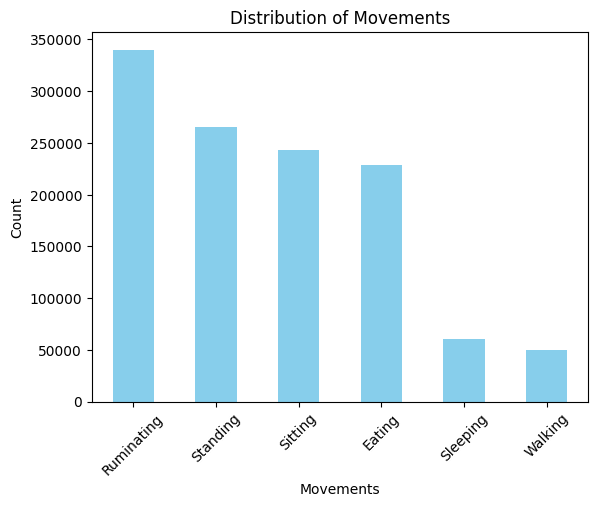

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the Movement column
df["Movement"].value_counts().plot(kind='bar', title="Distribution of Movements", color='skyblue')

plt.xlabel("Movements")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## Movement Class Distribution Analysis

The count plot visualizes the distribution of movement categories in the dataset.

Most Common Movements:

Ruminating is the most frequent activity (~350,000 instances).
Standing, Sitting, and Eating also have a significant number of samples.

Least Common Movements:

Walking and Sleeping have noticeably fewer occurrences.

**This suggests a potential class imbalance, which may affect model performance if not addressed.**

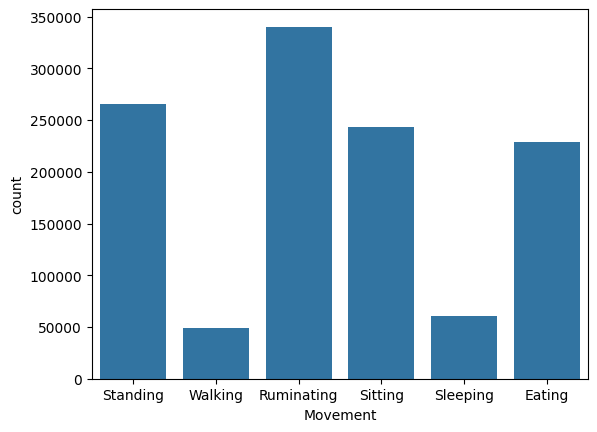

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
sns.countplot(x="Movement", data=df)
plt.show()

## Preparing for One-Hot Encoding

Before applying one-hot encoding, confirm that the dataset contains:


*    6 numerical sensor columns: Ax, Ay, Az, Gx, Gy, Gz (Accelerometer & Gyroscope readings)List item
*   1 categorical column: Movement (which needs encoding)

## Why One-Hot Encoding?
The Movement column is categorical (object type) and needs to be converted into numerical format for machine learning models.

One-Hot Encoding creates separate binary columns for each movement category (e.g., Standing → [1,0,0,0], Walking → [0,1,0,0]).












In [26]:
print("Before One-Hot Encoding:")
print(df.columns)  # Ensure all sensor columns (Ax, Ay, Az, Gx, Gy, Gz) are present

Before One-Hot Encoding:
Index(['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Movement'], dtype='object')


## One-Hot Encoding Applied Successfully
Now, the categorical Movement column has been transformed into separate binary columns, representing each movement type:



*   Sensor Data Columns Remain Unchanged:
Ax, Ay, Az, Gx, Gy, Gz (Accelerometer & Gyroscope readings).

*   New One-Hot Encoded Columns:

Movement_Eating
Movement_Ruminating
Movement_Sitting
Movement_Sleeping
Movement_Standing
Movement_Walking

Each row now has a 1 or 0 in these columns, indicating the movement type for that instance.

In [27]:
df_encoded = pd.get_dummies(df, columns=['Movement'], drop_first=False)
print("After One-Hot Encoding:")
print(df_encoded.columns)  # Ensure sensor columns still exist

After One-Hot Encoding:
Index(['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Movement_Eating',
       'Movement_Ruminating', 'Movement_Sitting', 'Movement_Sleeping',
       'Movement_Standing', 'Movement_Walking'],
      dtype='object')


In [28]:
print(df.head())  # Ensure Movement and sensor columns exist before encoding

       Ax      Ay      Az        Gx       Gy       Gz  Movement
0  0.9352  0.1724 -0.1853   10.6592   5.9937   6.5088  Standing
1  1.0557 -0.1746  0.3494 -103.1006  45.6616 -13.9697  Standing
2  0.9341  0.1008 -0.0164  -14.3921 -37.6025 -30.0049  Standing
3  0.9913  0.3686  0.2831   -1.2402  30.2222   5.8521  Standing
4  1.0998  0.2021  0.0040  -10.1733 -13.4399   2.4292  Standing


In [29]:
print(df_encoded.head())  # Check the dataset after encoding

       Ax      Ay      Az        Gx       Gy       Gz  Movement_Eating  \
0  0.9352  0.1724 -0.1853   10.6592   5.9937   6.5088            False   
1  1.0557 -0.1746  0.3494 -103.1006  45.6616 -13.9697            False   
2  0.9341  0.1008 -0.0164  -14.3921 -37.6025 -30.0049            False   
3  0.9913  0.3686  0.2831   -1.2402  30.2222   5.8521            False   
4  1.0998  0.2021  0.0040  -10.1733 -13.4399   2.4292            False   

   Movement_Ruminating  Movement_Sitting  Movement_Sleeping  \
0                False             False              False   
1                False             False              False   
2                False             False              False   
3                False             False              False   
4                False             False              False   

   Movement_Standing  Movement_Walking  
0               True             False  
1               True             False  
2               True             False  
3           

## Data Overview After Encoding

The df_encoded.info( ) output confirms:



*  Total Rows: 1,188,084 (No data loss after encoding).
*   Sensor Data Columns (float64): Ax, Ay, Az, Gx, Gy, Gz (Accelerometer & Gyroscope readings).

*   Encoded Movement Columns (bool):

Movement_Eating, Movement_Ruminating, Movement_Sitting, Movement_Sleeping, Movement_Standing, Movement_Walking.
These binary columns indicate the presence (True) or absence (False) of each movement type.

*   No Missing Values – The dataset is now fully preprocessed and ready for modeling.

In [30]:
print(df_encoded.info())  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
Index: 1188084 entries, 0 to 1368928
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Ax                   1188084 non-null  float64
 1   Ay                   1188084 non-null  float64
 2   Az                   1188084 non-null  float64
 3   Gx                   1188084 non-null  float64
 4   Gy                   1188084 non-null  float64
 5   Gz                   1188084 non-null  float64
 6   Movement_Eating      1188084 non-null  bool   
 7   Movement_Ruminating  1188084 non-null  bool   
 8   Movement_Sitting     1188084 non-null  bool   
 9   Movement_Sleeping    1188084 non-null  bool   
 10  Movement_Standing    1188084 non-null  bool   
 11  Movement_Walking     1188084 non-null  bool   
dtypes: bool(6), float64(6)
memory usage: 70.2 MB
None


In [31]:
print(df_encoded.describe())  # Summary statistics of numerical features

                 Ax            Ay            Az            Gx            Gy  \
count  1.188084e+06  1.188084e+06  1.188084e+06  1.188084e+06  1.188084e+06   
mean   7.586067e-01 -5.368187e-02  1.842426e-01  2.356660e-01  4.118679e-01   
std    4.358637e-01  3.525171e-01  3.866476e-01  2.188021e+01  1.375251e+01   
min   -9.933000e-01 -4.205800e+00 -3.471300e+00 -4.127832e+02 -3.180420e+02   
25%    7.777000e-01 -2.969000e-01 -1.910000e-02 -2.407200e+00 -1.101100e+00   
50%    9.181000e-01 -7.300000e-02  1.346000e-01 -2.246000e-01  1.807000e-01   
75%    9.726000e-01  2.049000e-01  3.024000e-01  1.464800e+00  1.748000e+00   
max    7.147500e+00  1.247000e+00  1.331000e+00  6.991527e+02  4.131299e+02   

                 Gz  
count  1.188084e+06  
mean  -6.695505e-01  
std    1.305652e+01  
min   -7.728028e+02  
25%   -1.750500e+00  
50%   -1.710000e-02  
75%    1.291500e+00  
max    2.534204e+02  


 ## Sensor Data Distribution Analysis

 The histograms display the distribution of accelerometer (Ax, Ay, Az) and gyroscope (Gx, Gy, Gz) readings.

 Key Observations:

*    Accelerometer Readings (Ax, Ay, Az)

Most values are centered around 0, indicating normal movement.
Ax has a right-skewed distribution, suggesting some extreme positive values.
*   Gyroscope Readings (Gx, Gy, Gz)

Gx has a strong peak near 0, with some high-magnitude values, possibly from sudden movements.
Gz has a very sharp peak, suggesting minimal variation in certain movements.
*   Potential Outliers:

Some axes (e.g., Ax, Gx) show long tails, indicating possible outliers from sudden changes in motion.
Preprocessing (e.g., clipping extreme values or normalization) may be necessary before training a machine learning model.


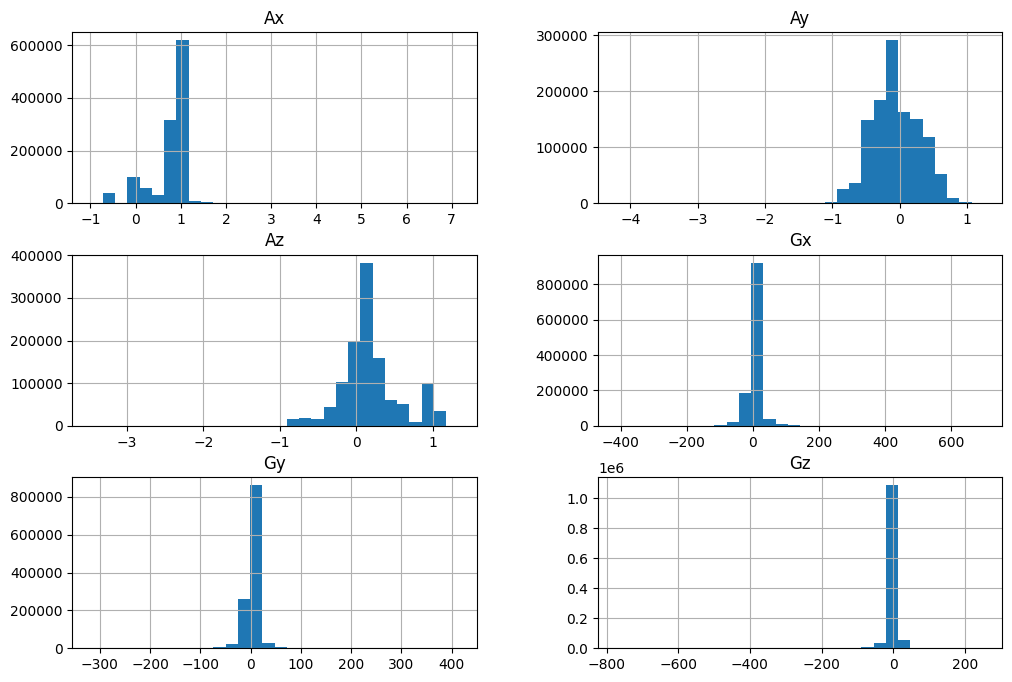

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions of sensor data
df_encoded[['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']].hist(figsize=(12, 8), bins=30)
plt.show()

## Outlier Removal Using Z-Score

This code removes outliers in sensor data (Ax, Ay, Az, Gx, Gy, Gz) using Z-score analysis.


1.  Computes Z-scores:

Standardizes sensor values to measure how far they deviate from the mean.
2.  Filters Outliers:

Keeps only rows where all sensor values have a Z-score between -3 and 3 (within 3 standard deviations).
This removes extreme outliers that could negatively impact machine learning performance.

In [33]:
from scipy.stats import zscore

# Compute z-scores for sensor data
z_scores = df_encoded[['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']].apply(zscore)

# Define threshold (remove values beyond 3 standard deviations)
df_encoded = df_encoded[(z_scores.abs() < 3).all(axis=1)]

## Sensor Data Distribution After Outlier Removal


*  More Normalized Distributions:

The data is now more centered around 0, reducing extreme skewness.
Ax, Ay, Az show a more balanced spread compared to before.
*   Reduced Extreme Values:

Previously, Gx, Gy, Gz had long tails and extreme spikes.
Now, values are within a reasonable range, making them more suitable for machine learning models.
*   Smoothed Gyroscope Distributions:

Gyroscope readings (Gx, Gy, Gz) previously had high peaks near 0 with extreme values.
The outlier removal process has kept the key distribution shape while reducing noise.

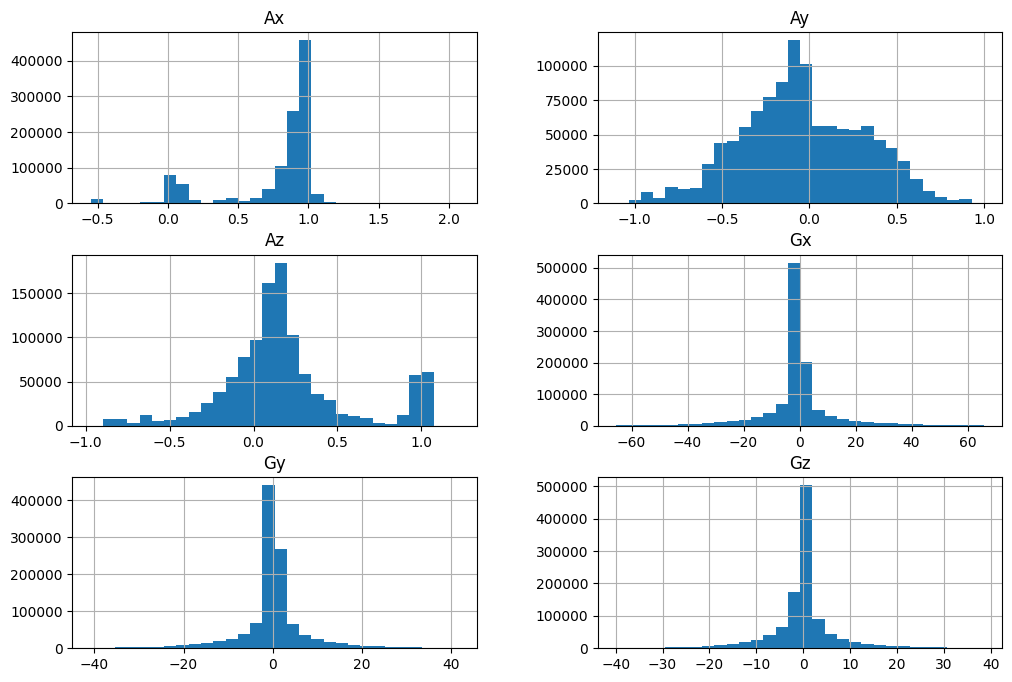

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions of sensor data
df_encoded[['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']].hist(figsize=(12, 8), bins=30)
plt.show()

## Statistics for Ax (After Outlier Removal)


*  Count: 1,105,286 rows (indicating some data was removed due to outlier filtering).
*   Mean: 0.77, suggesting a slight right-skew in the distribution.
*  Standard Deviation (std): 0.34, indicating moderate variation in the data.
*   Range:
Min: -0.55,
Max: 2.07

The values now fall within a reasonable range compared to before outlier removal.
*   Interquartile Range (IQR):
25%: 0.79, 75%: 0.97 → Most values are tightly clustered.

In [35]:
print(df_encoded['Ax'].describe())

count    1.105286e+06
mean     7.725054e-01
std      3.437113e-01
min     -5.489000e-01
25%      7.911000e-01
50%      9.185000e-01
75%      9.709000e-01
max      2.065700e+00
Name: Ax, dtype: float64


## Key Observations for Az (Accelerometer Z-Axis):


*   Mean: 0.18, indicating a more balanced distribution.
*   Standard Deviation: 0.39, slightly more dispersed than Ax.
*   Range:Min: -0.97, Max: 1.22

The values are much more controlled compared to earlier distributions.


In [36]:
print(df_encoded['Az'].describe())

count    1.105286e+06
mean     1.846555e-01
std      3.855119e-01
min     -9.708000e-01
25%     -1.130000e-02
50%      1.347500e-01
75%      2.896000e-01
max      1.221000e+00
Name: Az, dtype: float64


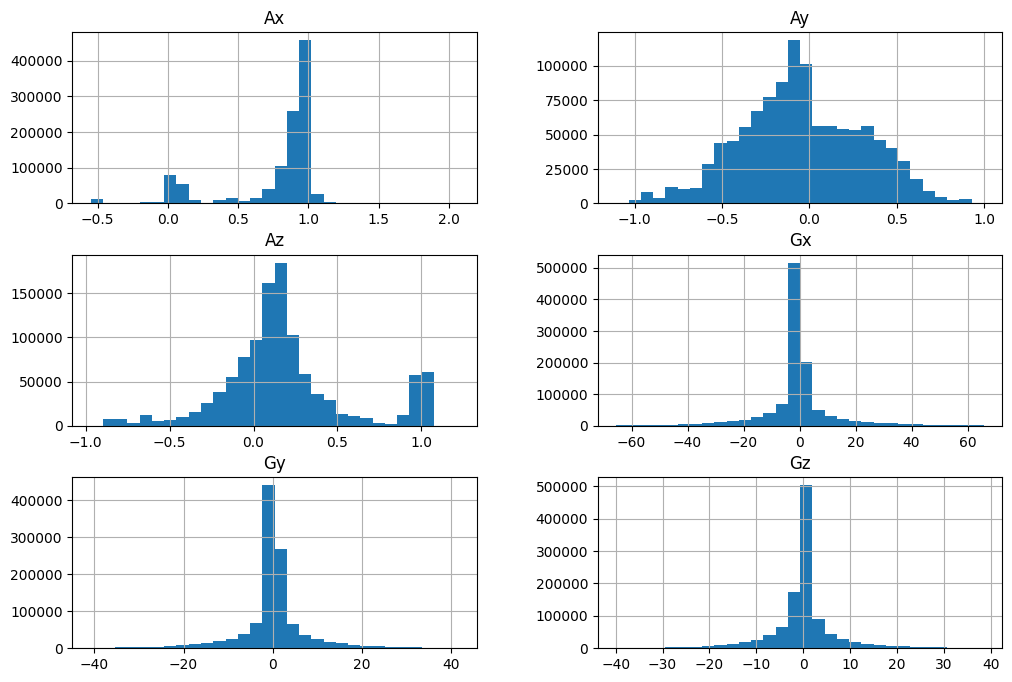

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions of sensor data
df_encoded[['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']].hist(figsize=(12, 8), bins=30)
plt.show()

## Outlier Removal Using IQR & Sensor Data Distribution Analysis

Implementation of IQR-based outlier detection for Ax as z-score didn't work out very much effectively.

1. Calculate Quartiles:
2. Define Bounds for Outliers:Any value outside these bounds is considered an outlier.
3. Filter Data:Removes rows where Ax values fall outside these bounds.

 This step ensures the dataset retains meaningful sensor readings.

In [38]:
import numpy as np

# Compute IQR for Ax
Q1 = df_encoded['Ax'].quantile(0.25)
Q3 = df_encoded['Ax'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_encoded = df_encoded[(df_encoded['Ax'] >= lower_bound) & (df_encoded['Ax'] <= upper_bound)]

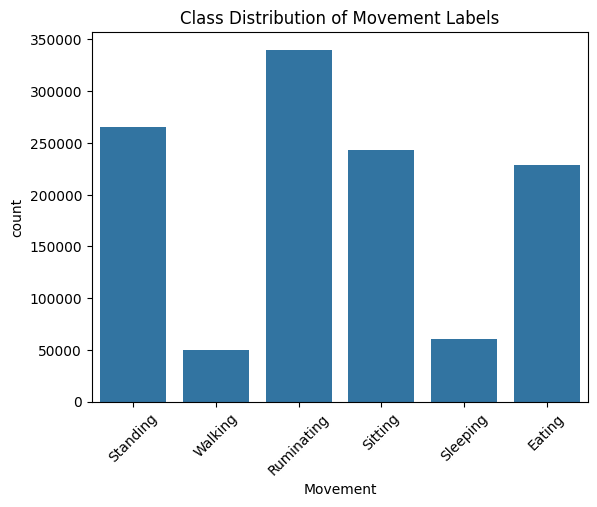

In [39]:
sns.countplot(x="Movement", data=df)  # Original 'Movement' column before encoding
plt.xticks(rotation=45)
plt.title("Class Distribution of Movement Labels")
plt.show()

<Axes: title={'center': 'Class Distribution (One-Hot Encoded)'}>

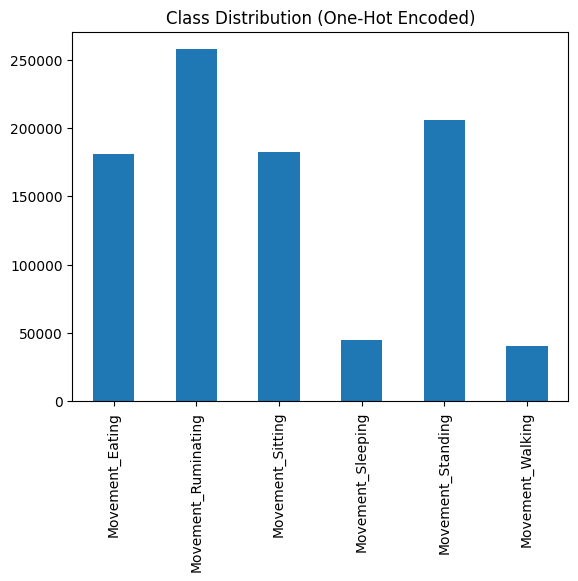

In [40]:
df_encoded.iloc[:, 6:].sum().plot(kind='bar', title="Class Distribution (One-Hot Encoded)")

## Correlation Between Movement Types and Sensor Features
This heatmap shows the correlation between sensor readings (Ax, Ay, Az, Gx, Gy, Gz) and movement types. Correlation values range from -1 to 1:

*  Ay Shows the Strongest Correlations:

Movement_Eating (0.06) and Movement_Standing (-0.09) suggest that lateral acceleration (Ay) plays a role in distinguishing these movements.

This indicates that Ay might be a useful feature in classifying movement types.


*  Weak Correlations for Other Sensors:

Ax, Az, Gx, Gy, Gz show very low correlation values (close to 0), suggesting that these features alone may not strongly predict movement types.

However, they might still contribute to multivariate classification models (e.g., Random Forest, Neural Networks).



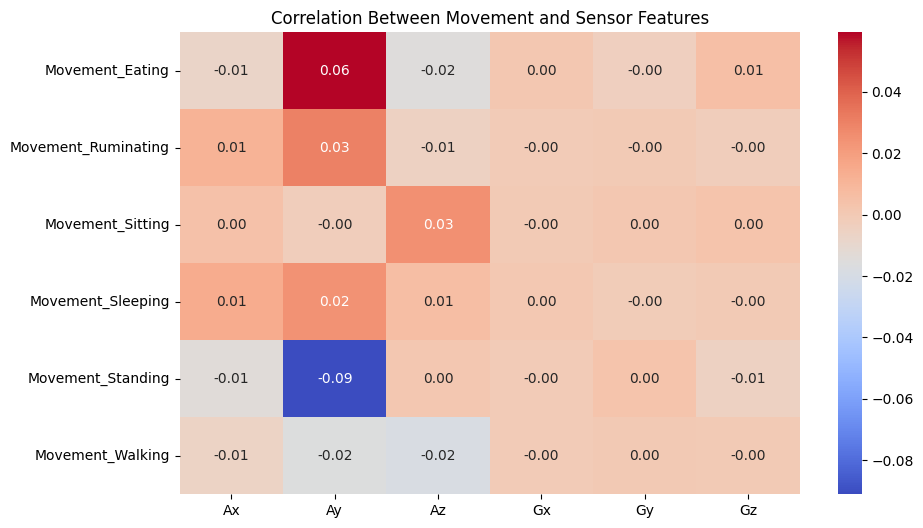

In [41]:
correlation_matrix = df_encoded.corr()

# Select only movement and sensor data
movement_columns = [col for col in df_encoded.columns if "Movement_" in col]
sensor_columns = ["Ax", "Ay", "Az", "Gx", "Gy", "Gz"]

correlation_subset = correlation_matrix.loc[movement_columns, sensor_columns]

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_subset, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Movement and Sensor Features")
plt.show()

## Correlation Between Engineered Features and Movement Types
This heatmap shows the correlation between newly engineered features:


*  Accel_Magnitude – Overall acceleration magnitude
*   Gyro_Magnitude – Overall gyroscope magnitude

and different movement types.

**Observations:**

*    Low Correlation with Movements

Both Accel_Magnitude and Gyro_Magnitude have very weak correlations with movement types (values close to 0).
This suggests that raw acceleration and gyroscope magnitudes alone may not be strong indicators of movement classification.
*  Slight Positive Correlation with Movement_Standing

Accel_Magnitude has a small positive correlation (0.04) with Standing, which might suggest that standing involves stable but noticeable acceleration.
*   Gyro_Magnitude and Accel_Magnitude Are Slightly Related (0.10)

This makes sense because movement generally involves both acceleration and rotational motion.

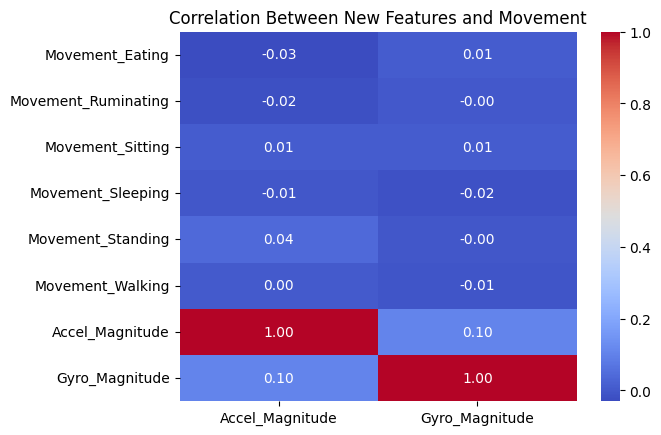

In [42]:
import numpy as np

# Compute sensor magnitude as a new feature
df_encoded['Accel_Magnitude'] = np.sqrt(df_encoded['Ax']**2 + df_encoded['Ay']**2 + df_encoded['Az']**2)
df_encoded['Gyro_Magnitude'] = np.sqrt(df_encoded['Gx']**2 + df_encoded['Gy']**2 + df_encoded['Gz']**2)

# Check updated correlation with new features
correlation_matrix = df_encoded.corr()
correlation_subset = correlation_matrix.loc[df_encoded.iloc[:, 6:].columns, ['Accel_Magnitude', 'Gyro_Magnitude']]

sns.heatmap(correlation_subset, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between New Features and Movement")
plt.show()

## Importing Necessary Libraries


*   torch, torch.nn, torch.optim → PyTorch for building and training the neural network.
*   train_test_split → Splitting data into training and testing sets.
*  MinMaxScaler → Normalizing sensor values for better model convergence.
*  SMOTE → Handles class imbalance if one class has much fewer samples.








In [43]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE  # Use as class imbalance exists

# Data Splitting & Normalization

## Setting Up Data for a Binary Classification Model (Rumination Detection)
This code prepares data for training a deep learning model using PyTorch to classify whether a cow is ruminating (healthy) or not (potentially unhealthy).

## Selecting Features (X)

Uses only sensor data (Ax, Ay, Az, Gx, Gy, Gz).

These features will be used to predict the cow's movement state.

## Defining the Target (y)

Binary classification problem:

1 → The cow is ruminating (healthy).

0 → The cow is not ruminating (potentially unhealthy).

This is achieved by converting the Movement_Ruminating one-hot encoded column into a binary label (astype(int)).


In [44]:
#Step 1: Select features (sensor data only) and target (binary label)
X = df_encoded[['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']]
y = (df_encoded['Movement_Ruminating'] == 1).astype(int)  # 1 = Healthy, 0 = Unhealthy

In [45]:
print(y.value_counts())  # Ensure balanced classes

Movement_Ruminating
0    655324
1    257615
Name: count, dtype: int64


## Feature Scaling Using MinMaxScaler
Normalizes the sensor data (X) using MinMaxScaler, which scales values between 0 and 1 in order to


*   Ensures all features have the same scale → Prevents large-magnitude features (e.g., gyroscope readings) from dominating small-magnitude features (e.g., accelerometer).
*   Improves convergence in deep learning models → Neural networks perform better when inputs are within a similar range.
*   Preserves Relationships Between Data Points → Unlike standardization (which transforms data to have mean=0 and std=1), MinMaxScaler keeps the original distribution but scales it within a fixed range.



In [46]:
#Step 2: Normalize sensor data (scale between 0 and 1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## Splitting Data into Training and Testing Sets
This code splits the normalized sensor data (X_scaled) and labels (y) into training and test sets for model evaluation.

In [47]:
#Step 3: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

## Class Imbalance Detected in the Dataset
The dataset contains:
*  655,324 samples (Class 0 - Not Ruminating)
*  257,615 samples (Class 1 - Ruminating)

This shows a class imbalance, where the "Not Ruminating" class has ~2.5 times more samples than the "Ruminating" class. If not handled, this imbalance may cause the machine learning model to be biased towards the majority class (Not Ruminating).

In [48]:
#Step 4: Apply SMOTE (ONLY on the training set if the dataset is imbalanced)
# Apply SMOTE only to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:", np.bincount(y_train_resampled))

Class distribution after SMOTE: [524259 524259]


Try Class Weights in the Neural Network

Instead of oversampling, assign higher loss weights to the minority class:

from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train.numpy())
class_weights = torch.tensor(class_weights, dtype=torch.float)

loss_fn = nn.BCEWithLogitsLoss(pos_weight=class_weights[1])  # Adjusts weight for minority class


## Converting Data to PyTorch Tensors for Neural Network Training
Converts the training and testing datasets into PyTorch tensors, which are required for deep learning models.



*  Tensors are required for PyTorch models – PyTorch operates on tensors instead of Pandas/NumPy arrays.
*    Ensures correct data format for Neural Networks – .view(-1,1) reshapes the labels for compatibility with PyTorch's loss functions.
*   Maintains numerical precision – Using float32 prevents errors related to data type mismatches.



In [49]:
#Step 5: Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

## Check Training & Testing Data Shape
This output confirms that the training and testing datasets have been correctly split and converted into PyTorch tensors.

**Observations:**


*   Training Data Shape: 1,048,518 samples with 6 features (sensor readings: Ax, Ay, Az, Gx, Gy, Gz).

*   Testing Data Shape: 182,588 samples used for evaluating model performance.

In [50]:
print("Training data shape:", X_train_tensor.shape)
print("Testing data shape:", X_test_tensor.shape)

Training data shape: torch.Size([1048518, 6])
Testing data shape: torch.Size([182588, 6])


## Preparing Data for Training
Before training the model, it is needed to efficiently handle the dataset. PyTorch provides TensorDataset and DataLoader to manage the training and testing data in batches.

*   Convert the Training & Testing Data into PyTorch Datasets.
*   Create DataLoader for Mini-Batch Processing.
*   Keeps test data order fixed for consistent evaluation.





In [51]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Building the Neural Network Model for Cow Health Classification

Define a 4-layer feedforward neural network using PyTorch’s nn.Module. This model will learn to classify movement patterns based on accelerometer (Ax, Ay, Az) and gyroscope (Gx, Gy, Gz) sensor readings.

Features of ANN:


1.   Input Layer

Takes in input_size features (6 sensor readings: Ax, Ay, Az, Gx, Gy, Gz).
2.   Hidden Layers

First Layer: 128 neurons, followed by Leaky ReLU activation to avoid dead neurons.

Second Layer: 64 neurons, using Leaky ReLU.

Third Layer: 32 neurons, using Leaky ReLU.
3. Output Layer

1 neuron (binary classification: ruminating (1) vs. not ruminating (0)).

Sigmoid activation function → Ensures output is between 0 and 1 (probability).
4. Forward Propagation (forward method): Data passes through the layers, applying activations at each step.
Uses Leaky ReLU for hidden layers and Sigmoid for the output layer.


In [52]:
class CowHealthANN(nn.Module):
    def __init__(self, input_size):
        super(CowHealthANN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # Increased neurons
        self.relu = nn.LeakyReLU(0.01)  # LeakyReLU to prevent dead neurons
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

## Instantiating and Displaying the ANN Model
Initializes the CowHealthANN model and prints its architecture. It ensures that the neural network is correctly set up before training.

In [53]:
# Instantiate model
model = CowHealthANN(input_size=X_train_tensor.shape[1])
print(model)

CowHealthANN(
  (fc1): Linear(in_features=6, out_features=128, bias=True)
  (relu): LeakyReLU(negative_slope=0.01)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


# Training the Model

## Defining the Loss Function & Optimizer for Training
Define the loss function (how well the model performs) and the optimizer (how the model updates its weights).

In [54]:
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss

In [55]:
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)

## Training the Neural Network (Forward & Backpropagation)
Update the model’s weights over multiple epochs to minimize the loss function.

In [56]:
# Training loop
epochs = 100  # Adjust as needed
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()  # Reset gradients
    y_pred = model(X_train_tensor)  # Forward pass
    loss = criterion(y_pred, y_train_tensor)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 0.6937
Epoch [20/100], Loss: 0.6932
Epoch [30/100], Loss: 0.6932
Epoch [40/100], Loss: 0.6931
Epoch [50/100], Loss: 0.6930
Epoch [60/100], Loss: 0.6929
Epoch [70/100], Loss: 0.6927
Epoch [80/100], Loss: 0.6924
Epoch [90/100], Loss: 0.6921
Epoch [100/100], Loss: 0.6918


# Evaluating Model Performance on the Test Set

Model Evaluation & Accuracy Calculation measures how well the trained model generalizes to unseen test data.



In [57]:
# Evaluate model
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test_tensor)
    y_test_pred = (y_test_pred > 0.5).float()  # Convert probabilities to binary labels

# Compute accuracy
accuracy = (y_test_pred.eq(y_test_tensor).sum() / y_test_tensor.shape[0]).item()
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.4529


# Visualizing Training Loss Curve

Analyze how well the model is learning during training by tracking the loss over epochs.
1. Collects Training Loss Over Epochs
2. Trains the Model and Updates Weights
3. Plots the Training Loss



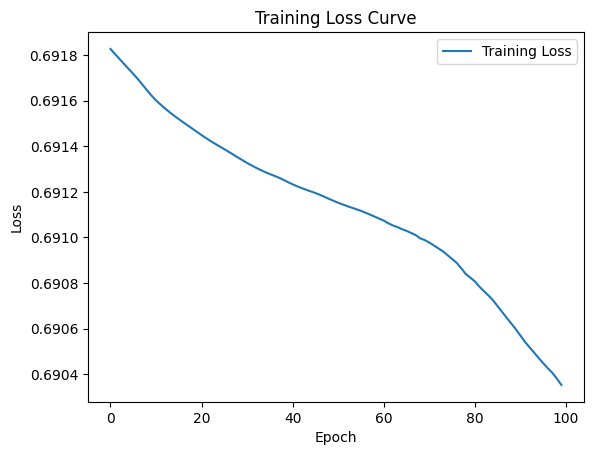

In [59]:
import matplotlib.pyplot as plt

losses = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Plot training loss
plt.plot(losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss Curve")
plt.show()

 ## Evaluating Model Performance Using Confusion Matrix



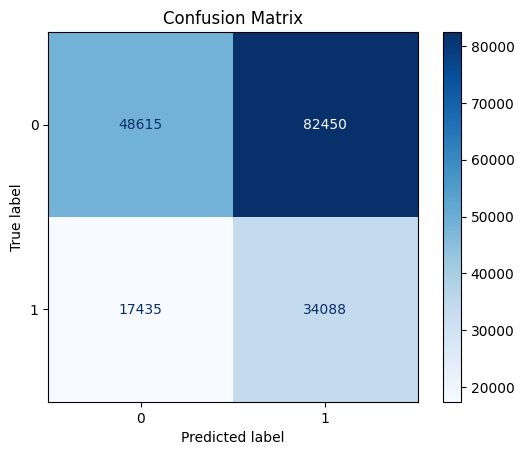

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test_tensor.numpy(), y_test_pred.numpy())

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()